In [1]:
import numpy as np
import pandas as pd
from scipy.special import exp10
from matplotlib import pylab as plt

from sklearn import datasets
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, silhouette_score

from pySeqUD.search import SeqUDOptimizer

## Example 1: Cliff-Shaped function

$$
f_{1}\left(x_{1}, x_{2} \right) = \left(x_{1}, x_{2} \right) = \exp \left\{-\frac{1}{2} \frac {x_{1}^{2}}{100} \right\} - \frac{1}{2} \left(x_{2} + 0.03 x_{1}^{2} - 3 \right)^{2}, \\
 x_{1} \in [-20,20 ] , x_{2} \in [-10,5].
$$

In [2]:
def cliff(parameters):
    
    x1 = parameters['x1']
    x2 = parameters['x2']

    term1 = -0.5*x1**2/100
    term2 = -0.5*(x2+0.03*x1**2-3)**2
    y = np.exp(term1 + term2)
    return  y

ParaSpace = {'x1': {'Type': 'continuous', 'Range': [-20,20], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [-10,5], 'Wrapper': lambda x: x}}

Level_Number = 20
clf = SeqUDOptimizer(cliff, ParaSpace, Level_Number, n_jobs = 10, verbose = True)
clf.search()

Stage 1 completed (20/100). Score: 0.87563 and Parameters: x1 = 5.00000 x2 = 2.37500
Stage 2 completed (34/100). Score: 0.99222 and Parameters: x1 = 0.00000 x2 = 3.12500
Stage 3 completed (48/100). Score: 0.99222 and Parameters: x1 = 0.00000 x2 = 3.12500
Stage 4 completed (62/100). Score: 0.99604 and Parameters: x1 = 0.75000 x2 = 3.03125
Stage 5 completed (76/100). Score: 0.99981 and Parameters: x1 = -0.12500 x2 = 2.98438
Stage 6 completed (91/100). Score: 0.99981 and Parameters: x1 = -0.12500 x2 = 2.98438
Maximum number of runs reached, stop!


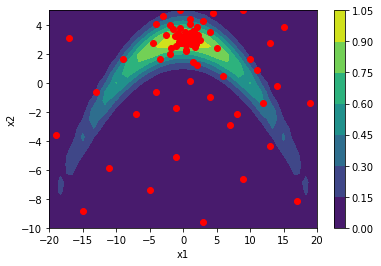

In [3]:
grid_num = 25
xlist = np.linspace(-20, 20, grid_num)
ylist = np.linspace(-10, 5, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, x1 in enumerate(xlist):
    for j, x2 in enumerate(ylist):
        Z[j,i] = cliff({"x1": x1, "x2": x2})
        
cp = plt.contourf(X, Y, Z)
plt.scatter(clf.logs.loc[:,['x1']], 
            clf.logs.loc[:,['x2']], color = "red")
plt.ylim(-10,5)
plt.xlim(-20,20)
plt.colorbar(cp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Example 2: Octopus-Shaped function

$$
f_{2}(x_{1}, x_{2})  = 2\cos(10x)\sin(10y)+\sin(10xy), \quad x_{1}, x_{2} \in [0, 1].
$$

In [4]:
def octopus(parameters):
    
    x1 = parameters['x1']
    x2 = parameters['x2']

    y = 2*np.cos(10*x1)*np.sin(10*x2)+np.sin(10*x1*x2)
    return  y

ParaSpace = {'x1': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}}

Level_Number = 20
clf = SeqUDOptimizer(octopus, ParaSpace, Level_Number, n_jobs = 10, verbose = True)
clf.search()

Stage 1 completed (20/100). Score: 2.69862 and Parameters: x1 = 0.32500 x2 = 0.52500
Stage 2 completed (34/100). Score: 2.72864 and Parameters: x1 = 0.30000 x2 = 0.42500
Stage 3 completed (49/100). Score: 2.93829 and Parameters: x1 = 0.33750 x2 = 0.46250
Stage 4 completed (62/100). Score: 2.98400 and Parameters: x1 = 0.30625 x2 = 0.46875
Stage 5 completed (76/100). Score: 2.99152 and Parameters: x1 = 0.31563 x2 = 0.46562
Stage 6 completed (90/100). Score: 2.99600 and Parameters: x1 = 0.31406 x2 = 0.47344
Maximum number of runs reached, stop!


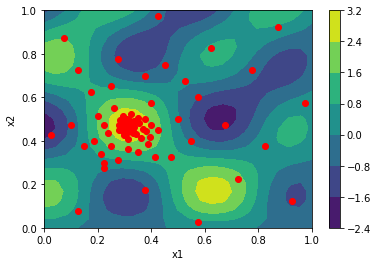

In [5]:
grid_num = 25
xlist = np.linspace(0, 1, grid_num)
ylist = np.linspace(0, 1, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, x1 in enumerate(xlist):
    for j, x2 in enumerate(ylist):
        Z[j,i] = octopus({"x1": x1, "x2": x2})
        
cp = plt.contourf(X, Y, Z)
plt.scatter(clf.logs.loc[:,['x1']], 
            clf.logs.loc[:,['x2']], color = "red")
plt.ylim(0,1)
plt.xlim(0,1)
plt.colorbar(cp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()